In [1]:
#Basic library import for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import heartdisease.csv file
df=pd.read_csv('heartdisease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


Remark: For understanding of feature some information from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
        
        1. age: age in years
        2. sex: sex (1 = male; 0 = female)
        3. cp: chest pain type- Value 1: typical angina,Value 2: atypical angina,Value 3: non-anginal pain, Value 4: asymptomatic
        4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
        5. chol: serum cholestoral in mg/dl
        6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        7. restecg: resting electrocardiographic results :- Value 0: normal
                    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        8.  thalach: maximum heart rate achieved
        9. exang: exercise induced angina (1 = yes; 0 = no)
        10. oldpeak = ST depression induced by exercise relative to rest
        11.  slope: the slope of the peak exercise ST segment:-Value 1: upsloping,Value 2: flat,Value 3: downsloping
        12. ca: number of major vessels (0-3) colored by flourosopy
        13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
        14. num: diagnosis of heart disease (angiographic disease status)
            -- Value 0: < 50% diameter narrowing
            -- Value 1: > 50% diameter narrowing
-           
    
        
            

In [3]:
df.shape

(200, 14)

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exange', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [5]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exange      object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exange    200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Remaark:-
    1. Here show no any missing value in the dataset because in the place of null value ? sign place.
    2. Null value show by the NaN or no any value than total null value show in particular features.
    3. Here firstly replace the ? sign with Nan than find out exaxt number of null value in particular columns.

In [7]:
#replce the ? sign with NaN
df=df.replace('?',np.NaN)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exange    147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


Finding:
    1. Null value present in rhe maximum features in the dataset.
    2. 200 row with 14 columns in this dataset.
    3. 9 features is object type and 5 features is int type.
    4. More than 50 null value in thal and ca features so its drop when cleanising the data.
    5. And others features null value fiilup by mean or mode stadegy for understanding of the data.
    6. Accoring to data value in a features either int or flot datatype so features data type also change before fillup null value. 

### To check missing value

In [9]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exange       53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [10]:
df.drop(columns=['ca','thal'],axis=1,inplace=True)

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
0,63,1,4,140,260,0,1,112,1,3,2,2
1,44,1,4,130,209,0,1,127,0,0,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,2
3,55,1,4,142,228,0,1,149,1,2.5,1,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0


In [12]:
#Exploring the data variable
for i in df:
    print(i,'\n',df[i].unique(),'\n\n')

age 
 [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37] 


sex 
 [1 0] 


cp 
 [4 3 2 1] 


trestbps 
 ['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' nan '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127'] 


chol 
 ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305'
 '223' '282' '349' nan '160' '312' '283' '142' '211' '306' '222' '202'
 '197' '204' '274' '192' '298' '272' '200' '261' '181' '221' '175' '219'
 '310' '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244'
 '285' '243' '237' '165' '287' '256' '264' '226' '207' '284' '33

In [13]:
#Changing the data type of columns 

df['trestbps']=pd.to_numeric(df['trestbps'],errors='coerce')
df['chol']=pd.to_numeric(df['chol'],errors='coerce')
df['fbs']=pd.to_numeric(df['fbs'],errors='coerce')
df['thalach']=pd.to_numeric(df['thalach'],errors='coerce')
df['exange']=pd.to_numeric(df['exange'],errors='coerce')
df['oldpeak']=pd.to_numeric(df['oldpeak'],errors='coerce')
df['slope']=pd.to_numeric(df['slope'],errors='coerce')

In [14]:
#check data type
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exange      float64
oldpeak     float64
slope       float64
num           int64
dtype: object

In [15]:
#Checking mean of the columns

print(df.trestbps.mean())
print(df.chol.mean())
print(df.fbs.mode())  #features data categorical type either o or 1 (1 = true; 0 = false)
print(df.thalach.mean())
print(df.exange.mode())  #features data categorical type either o or 1 (1 = yes; 0 = no)
print(df.oldpeak.mean())
print(df.slope.mode())   #features data categorical type Value 1: upsloping,Value 2: flat,Value 3: downsloping

133.76388888888889
178.7461139896373
0    0.0
dtype: float64
122.79591836734694
0    1.0
dtype: float64
1.3208333333333333
0    2.0
dtype: float64


In [16]:
#Now fill the missing values 

df['trestbps'].fillna(df['trestbps'].mean(),inplace=True)
df['chol'].fillna(df['chol'].mean(),inplace=True)
df['fbs'].fillna(0,inplace=True)
df['thalach'].fillna(df['thalach'].mean(),inplace=True)
df['exange'].fillna(1,inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)
df['slope'].fillna(2,inplace=True)

In [17]:
#After fillup null value check
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exange      0
oldpeak     0
slope       0
num         0
dtype: int64

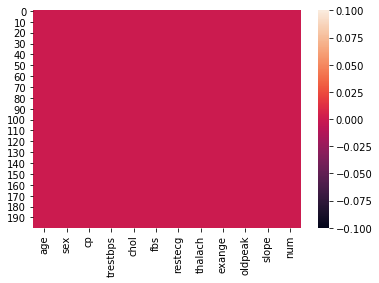

In [18]:
sns.heatmap(df.isnull())
plt.show()

## Summary statistics

In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.340000,0.735000,122.795918,0.740000,1.320833,2.065000,1.520000
std,7.811697,0.171015,0.795701,18.257507,112.011633,0.474898,0.683455,18.835692,0.439735,0.937755,0.471046,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,133.763889,214.000000,0.000000,1.000000,122.795918,1.000000,1.320833,2.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.000000,1.000000,2.000000,2.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


Observation:
    1. Age range of this dataset 35 to 77.
    2. Standard deviation more in chol and thalach feature.
    

In [20]:
#check coorelation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
age,1.000000,0.034230,-0.038280,0.181584,0.066972,0.135728,0.002400,-0.149949,0.129027,0.157087,0.107135,0.287289
sex,0.034230,1.000000,0.038036,0.012585,-0.096150,-0.059400,0.060621,-0.001592,0.029402,0.097267,0.086709,0.147470
cp,-0.038280,0.038036,1.000000,0.074638,0.065818,-0.044416,0.034790,-0.123597,0.089904,0.040155,0.059460,0.168210
trestbps,0.181584,0.012585,0.074638,1.000000,0.150192,0.192337,0.092042,-0.013046,0.205900,0.115432,0.083459,0.141719
chol,0.066972,-0.096150,0.065818,0.150192,1.000000,0.173396,0.024257,-0.041209,0.117050,0.002160,0.043363,0.076444
fbs,0.135728,-0.059400,-0.044416,0.192337,0.173396,1.000000,0.170616,0.037972,-0.176144,-0.105363,-0.009435,0.048940
restecg,0.002400,0.060621,0.034790,0.092042,0.024257,0.170616,1.000000,0.012348,-0.063203,-0.106991,-0.039881,-0.032800
thalach,-0.149949,-0.001592,-0.123597,-0.013046,-0.041209,0.037972,0.012348,1.000000,-0.070142,0.172048,-0.107241,-0.079077
exange,0.129027,0.029402,0.089904,0.205900,0.117050,-0.176144,-0.063203,-0.070142,1.000000,0.289320,0.106259,0.206541
oldpeak,0.157087,0.097267,0.040155,0.115432,0.002160,-0.105363,-0.106991,0.172048,0.289320,1.000000,0.292698,0.378209


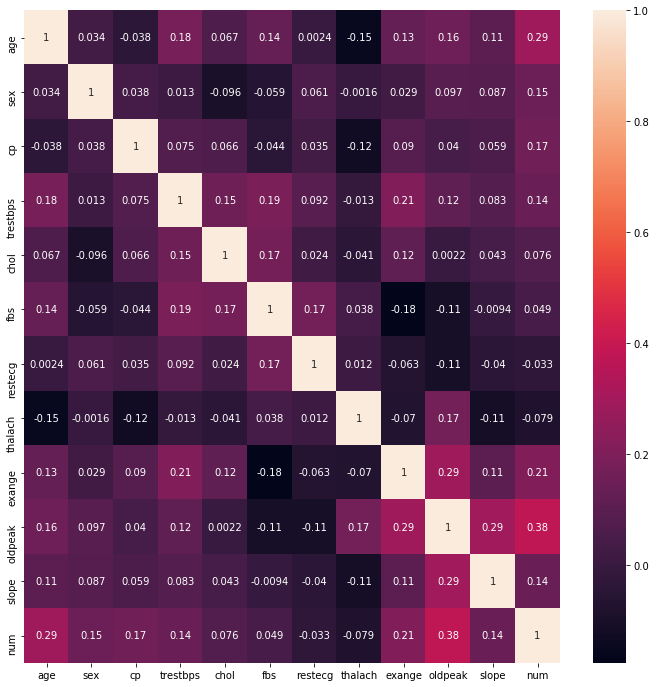

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

Observation:
    1. Tageget feature is num negative coorelated with thalach and restecg.
    2. num is positvely correlated with maximum feature.
    3.thalach is negatively correlated with maximum feature.
    4. Lights shade are positve correlated.
    

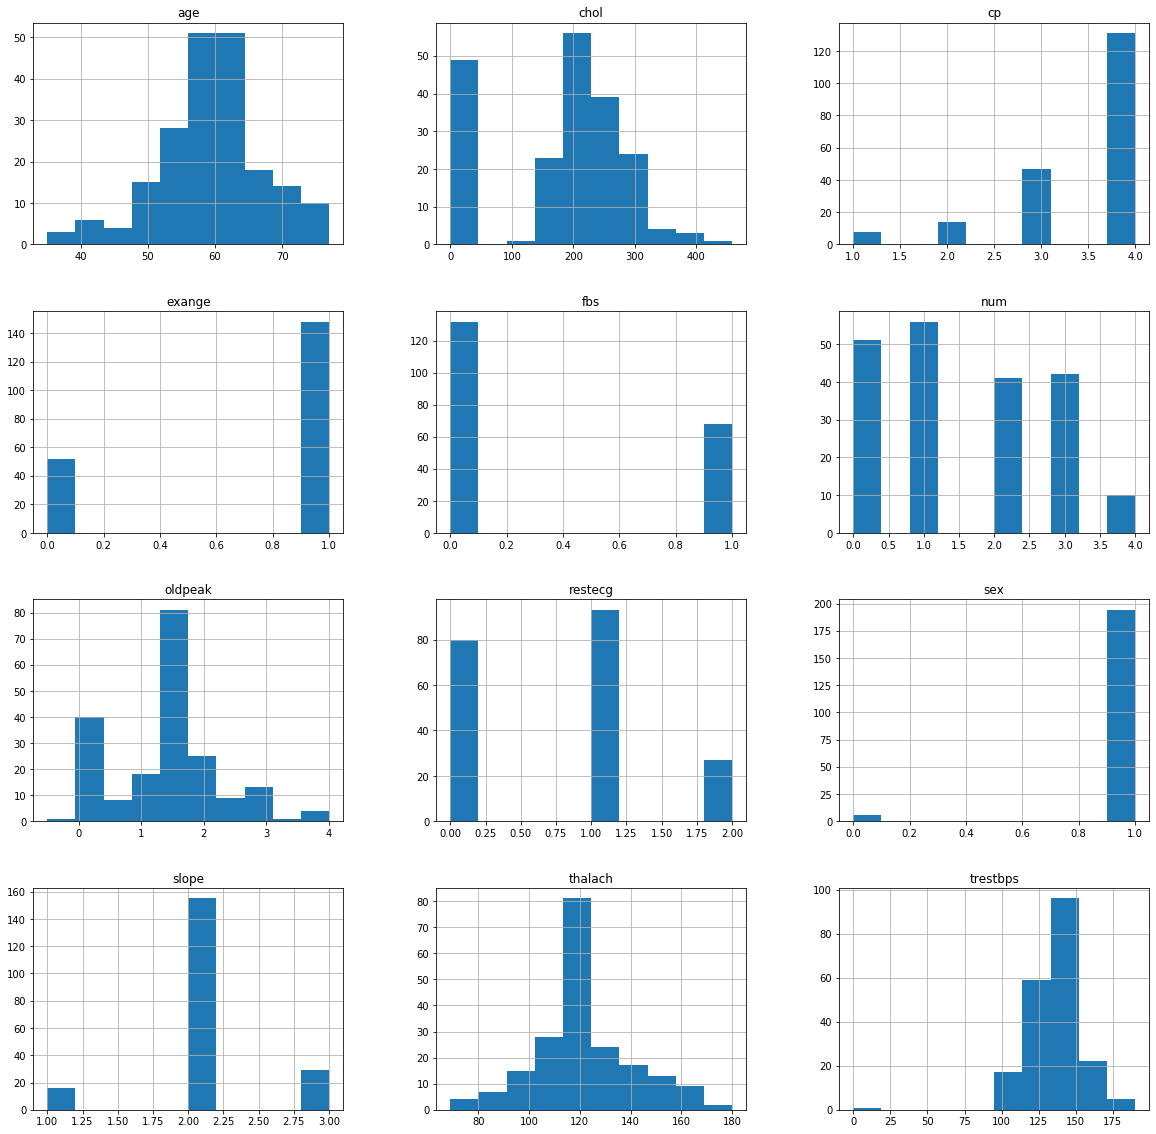

In [22]:
df.hist(figsize=(20,20))
plt.show()

Observation:
    1. Age distribution is a slightly right-skewed normal distribution with the heart disease between 55 and 65 years old.
    2.  Several distributions are right-skewed

## Data visualization

In [23]:
#attempting to distinguish presence (values 1,2,3,4) from absence (value 0).
df['num']=df.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

1    149
0     51
Name: num, dtype: int64


Text(0.5, 1.0, ' Heart disease status')

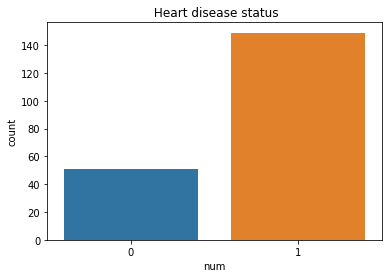

In [24]:
#Start with Target Variable: num
print(df['num'].value_counts())
sns.countplot(df['num'])
plt.title(' Heart disease status')

Observation: In this dataset Heart disease presence more than no presence:-1 for presence and 0 for no presence

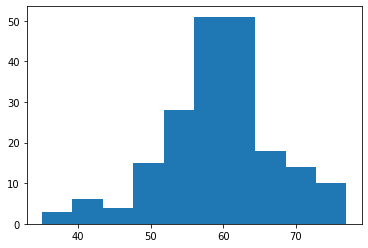

In [25]:
# Lets draw histogram for Age 
plt.hist(x='age',bins=10,data=df)
plt.show()

Observation: In this dataset age between 50 to 65 many pepole.

1    194
0      6
Name: sex, dtype: int64


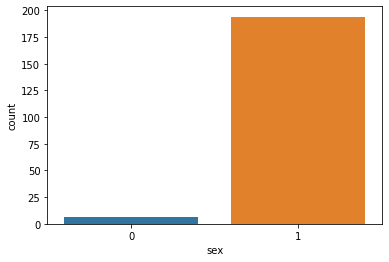

In [26]:
print(df['sex'].value_counts())
sns.countplot(df['sex'])

Finding:- (1 = male; 0 = female) Difference between male and female number huge male=194 and female only 6 in this dataset

Text(0.5, 1.0, 'Heart disease status with respect sex')

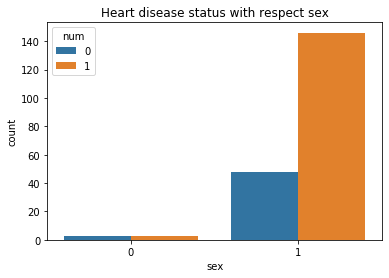

In [27]:
#sx vs num
sns.countplot(x='sex',hue='num',data=df)
plt.title('Heart disease status with respect sex')

Observation: Heart disease presence in male more according male number out of 194 male 140 male affect with Heart disease.

0.0    132
1.0     68
Name: fbs, dtype: int64


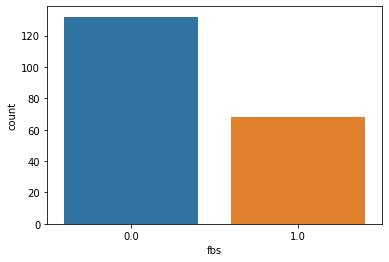

In [28]:
print(df['fbs'].value_counts())
sns.countplot(df['fbs'])

Observation:
    1. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false).
    2. 132 pepole fasting blood sugar level more than 120 mg/dl means.
    3. so find out sugar affect of sugar on Heart.

Text(0.5, 1.0, 'fbs vs heart disease ')

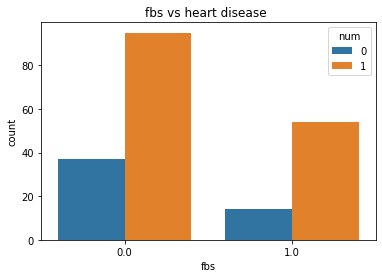

In [29]:
sns.countplot(x='fbs',hue='num',data=df)
plt.title('fbs vs heart disease ')

Observation: When people patient of sugar disease than maximum chances for Heart disease problem for sugar patient.
    2. For sugar patient control the sugar level than risk factor minimize for Heart disease problem.

4    131
3     47
2     14
1      8
Name: cp, dtype: int64


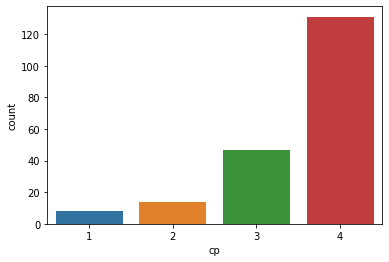

In [30]:
print(df['cp'].value_counts())
sns.countplot(df['cp'])

Finding:
    1.  cp: chest pain type- Value 1: typical angina,Value 2: atypical angina,Value 3: non-anginal pain, Value 4: asymptomatic
    2. asymptomatic number more  comperison to typical angina and atypical angina.
    3. chest pain one simterm of angiographic disease status but asymptomatic patient number more.

Text(0.5, 1.0, 'chest pain one simterm of angiographic disease status')

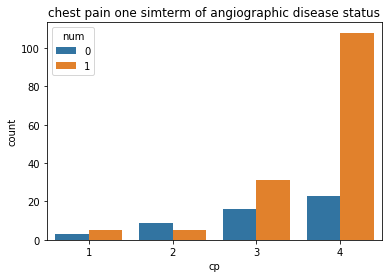

In [31]:
#cp vs num
sns.countplot(x='cp',hue='num',data=df)
plt.title('chest pain one simterm of angiographic disease status')

Observation: % of changes maximum for Heart Disease problem without chest pain simterm 

1    93
0    80
2    27
Name: restecg, dtype: int64


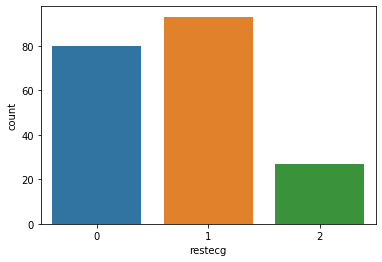

In [32]:
print(df['restecg'].value_counts())
sns.countplot(df['restecg'])

finding:
     restecg: resting electrocardiographic results :- Value 0: normal
                Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
                Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

Text(0.5, 1.0, 'restecg vs hum')

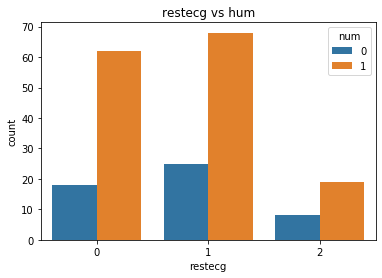

In [33]:
sns.countplot(x='restecg',hue='num',data=df)
plt.title('restecg vs hum')

Observation:- resting electrocardiographic results best way to find ot Heart patient.

2.0    155
3.0     29
1.0     16
Name: slope, dtype: int64


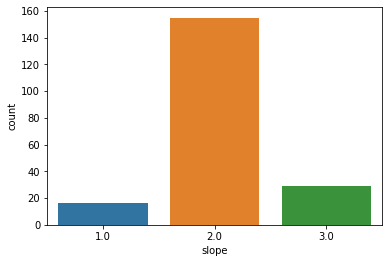

In [34]:
print(df['slope'].value_counts())
sns.countplot(df['slope'])

Finding:-slope: the slope of the peak exercise ST segment:-Value 1: upsloping,Value 2: flat,Value 3: downsloping

Text(0.5, 1.0, 'slope vs num')

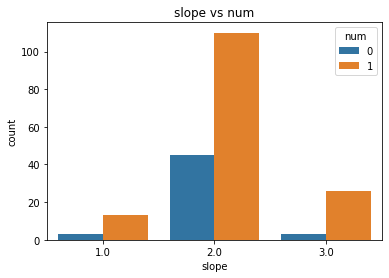

In [35]:
sns.countplot(x='slope',hue='num',data=df)
plt.title('slope vs num')

Observation:- exercise is better for control the risk factor of Heart disease.

In [36]:
# check some factor only for active patient
dec_yes=df[df['num']==1]

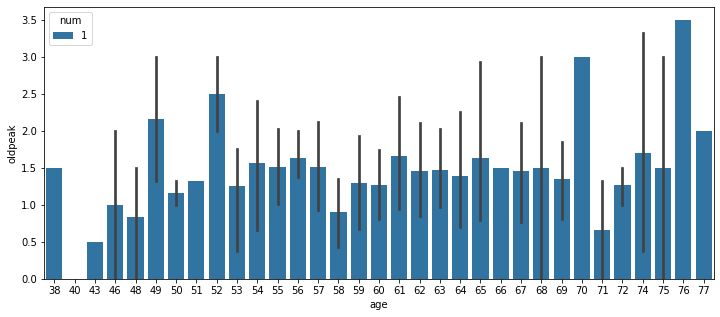

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='age', y='oldpeak', hue='num', data=dec_yes)

Text(0.5, 1.0, 'Heart disease problem according to sex')

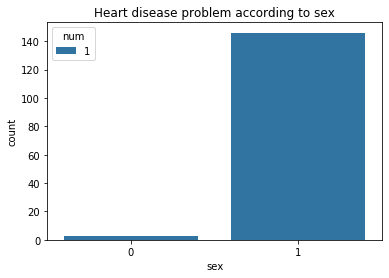

In [38]:
sns.countplot(x='sex',hue='num',data=dec_yes)
plt.title('Heart disease problem according to sex')

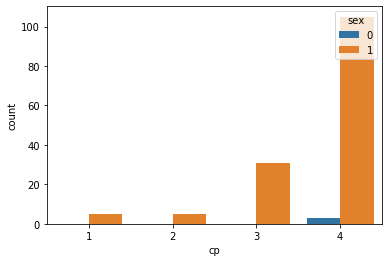

In [39]:
sns.countplot(x='cp',data=dec_yes,hue='sex')

Observation: chest pain simterm not present 100 patient out of 140

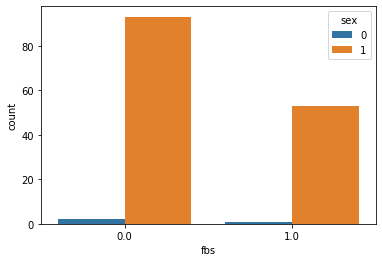

In [40]:
sns.countplot(x='fbs',data=dec_yes,hue='sex')

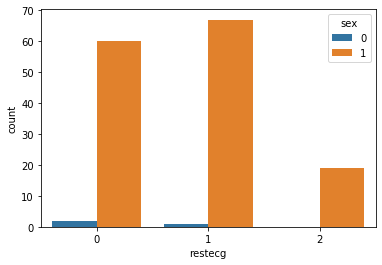

In [41]:
sns.countplot(x='restecg',data=dec_yes,hue='sex')

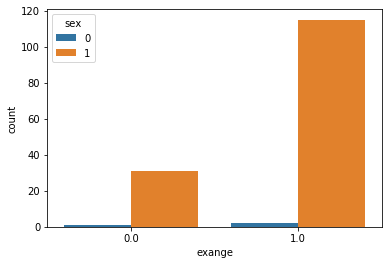

In [42]:
sns.countplot(x='exange',data=dec_yes,hue='sex')

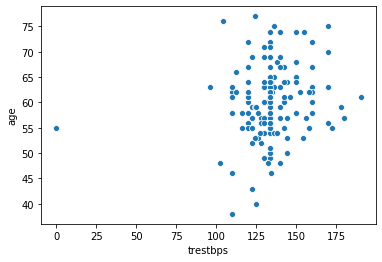

In [43]:
sns.scatterplot(x='trestbps',y='age', data=dec_yes)

Observation: resting blood pressure (in mm Hg on admission to the hospital) more in above 55 age.
    2. After 55 age bp problem changes more and more changes for Heart disease.

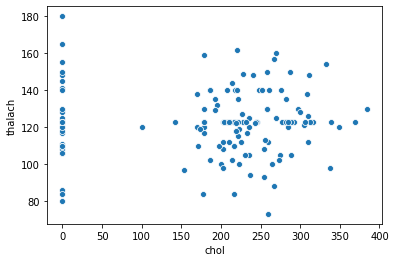

In [44]:
sns.scatterplot(x='chol',y='thalach', data=dec_yes)

Observation:
    1. If maximum heart rate more than 80 than Heart Disease probelm start or maximum chanse for heart problem.
    2. So heart rate achive less 80 for control risk factor.
    3. cholestoral in mg/dl more than 150 than its very dangerous for Heart.

EDA Concluding Remark:
    1. The dataset feature have missing value and some features are not correct data type.
    2. The positive correlations with the target features are: age,and oldpeak.
    3. The negative correlations with the target features are: restecg,thalach.
    4. The dataset is imbalanced with the majoriy of observations describing for male.
    5. heart rate and cholestoral main risk factor Heat disease.
    6. asymptomatic chest pain simterm more in Heart patient.

### Check skewness

In [45]:
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -1.511363
chol       -0.571879
fbs         0.680636
restecg     0.391463
thalach     0.148515
exange     -1.102593
oldpeak     0.423414
slope       0.210521
num        -1.132724
dtype: float64

In [46]:
#Lets treat the skewness
import numpy as np
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [47]:
#Again check skewness
df.skew()

age        -0.404091
sex        -5.552105
cp         -2.168404
trestbps   -9.555472
chol       -1.118785
fbs         0.680636
restecg     0.391463
thalach     0.148515
exange     -1.102593
oldpeak     0.423414
slope       0.210521
num        -1.132724
dtype: float64

Remark: After removing skewness skewness value increse.

## Plotting Outliers

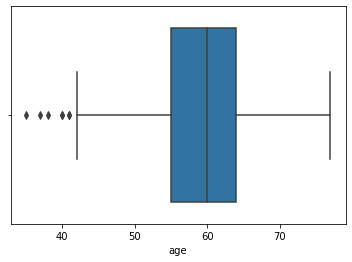

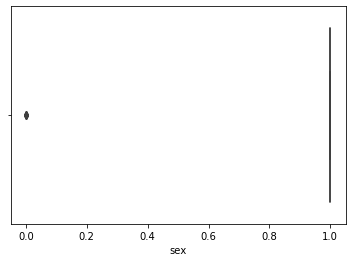

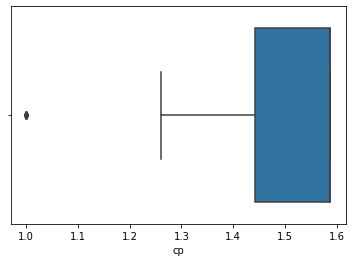

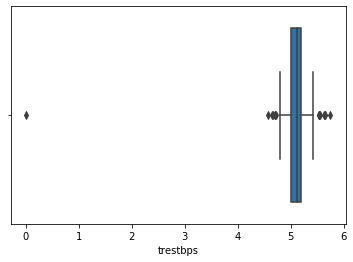

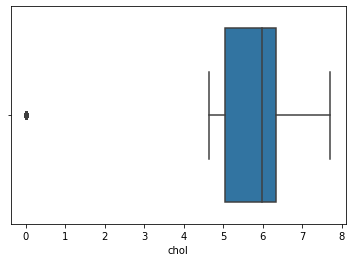

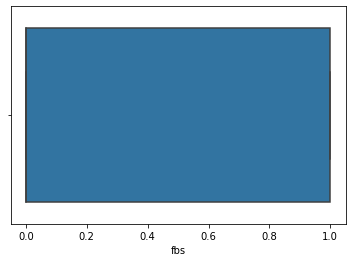

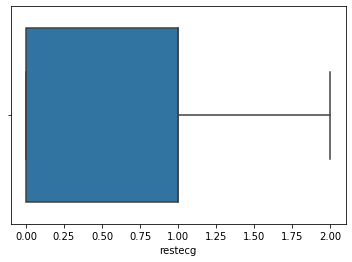

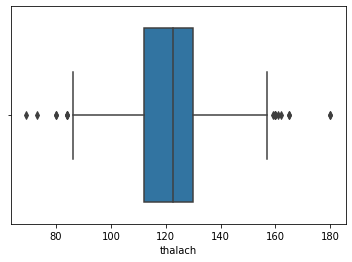

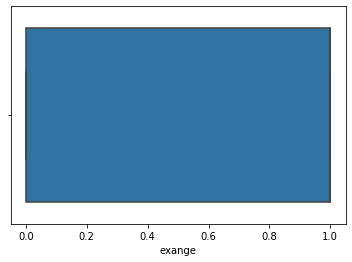

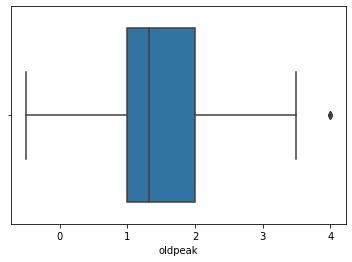

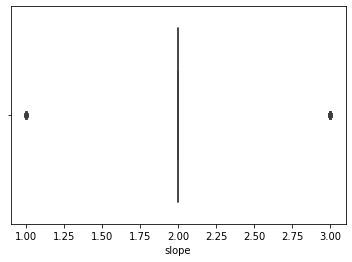

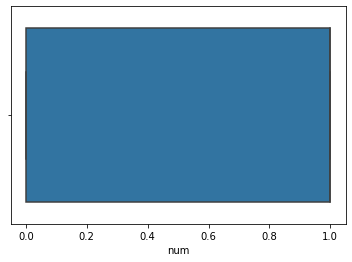

In [48]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

Observation: Outliers present in some features but more outliers not present.

    

### Removing outliers

In [49]:
#make copy od dataset
df1=df.copy()
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,oldpeak,slope,num
0,63,1.0,1.587401,5.192494,6.382504,0.0,1,112.0,1.0,3.0,2.0,1.0
1,44,1.0,1.587401,5.065797,5.934472,0.0,1,127.0,0.0,0.0,2.0,0.0
2,60,1.0,1.587401,5.091643,6.018462,0.0,1,140.0,1.0,1.5,3.0,1.0
3,55,1.0,1.587401,5.217103,6.109115,0.0,1,149.0,1.0,2.5,1.0,1.0
4,66,1.0,1.442250,4.791420,5.972093,1.0,2,99.0,1.0,1.3,2.0,0.0


In [50]:
df1.shape

(200, 12)

In [51]:
from scipy.stats import zscore
z=np.abs(zscore(df1.describe()))
z

array([[2.4547973 , 2.64570583, 2.64568488, 2.64431837, 2.64418339,
        2.64570543, 2.64564416, 1.5022677 , 2.64570396, 2.64532557,
        2.64559602, 2.64570388],
       [0.19641826, 0.37438344, 0.37426919, 0.35782066, 0.3774776 ,
        0.37889908, 0.37854204, 0.06278707, 0.37579091, 0.3797168 ,
        0.37376054, 0.37571988],
       [1.16790174, 0.38650727, 0.39505047, 0.42988434, 0.40784806,
        0.37685555, 0.37932433, 1.87556552, 0.380344  , 0.38554946,
        0.39807516, 0.38039096],
       [0.65540937, 0.38910226, 0.38198093, 0.43621594, 0.44933314,
        0.38404967, 0.38969692, 0.94024516, 0.38701196, 0.40744038,
        0.39000635, 0.38701677],
       [0.27841462, 0.37392822, 0.37525237, 0.35904896, 0.37129186,
        0.38404967, 0.38969692, 0.1385043 , 0.38701196, 0.38460173,
        0.37475206, 0.38701677],
       [0.18416593, 0.37392822, 0.37304397, 0.35744325, 0.35681497,
        0.38404967, 0.37452022, 0.06278707, 0.37184838, 0.3797168 ,
        0.37475206,

In [52]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


Finding: No any row detected as outliers.

## Machine Learning Algorithm

In [53]:
# Splitting into trainng and test set
x=df1.drop(columns=['num'])
y=df1['num']

In [54]:
#Scaling data using StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [55]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [56]:
print(x_train.shape,x_test.shape)

(160, 11) (40, 11)


In [57]:
print(y_train.shape,y_test.shape)

(160,) (40,)


In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

In [59]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [60]:

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 10}

In [61]:
KNN=KNeighborsClassifier(n_neighbors=10)

In [62]:
#Support Vector Classifier
from sklearn.svm import SVC

svc=SVC()
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 10, 'kernel': 'poly'}

In [63]:

SV=SVC(kernel='poly',C=10)

In [64]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

criterion = {'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier(random_state=42)
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'entropy'}

In [65]:
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [66]:
#Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(100,200,300)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [67]:
RFC=RandomForestClassifier(n_estimators=100,random_state=42)

In [68]:
#Gradient Boosting Classifier

GBC=GradientBoostingClassifier(n_estimators=250)

In [69]:
#Extra Trees Classifier

ETC=ExtraTreesClassifier(n_estimators=250)

In [70]:
#AdaBoost Classifier

ABC=AdaBoostClassifier(n_estimators=50)

In [71]:
#Bagging Classifier

BC=BaggingClassifier(n_estimators=250)

In [72]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC(kernel='poly',C=10)
LR=LogisticRegression()
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)
GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [74]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DTC))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [75]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

************ KNeighborsClassifier **********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy_score= 0.8


Cross_Val_Score= 0.77


roc_auc_score= 0.6666666666666667


classification_report
               precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        10
         1.0       0.82      0.93      0.87        30

    accuracy                           0.80        40
   macro avg       0.75      0.67      0.69        40
weighted avg       0.78      0.80      0.78        40



[[ 4  6]
 [ 2 28]]





************ SVC **********


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy_score= 0.725



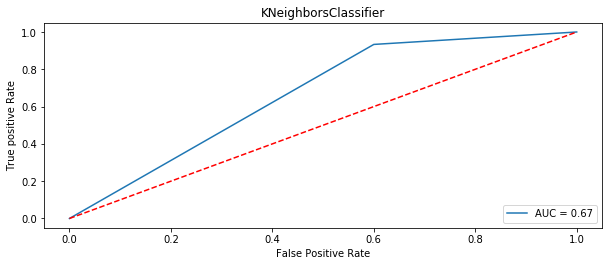

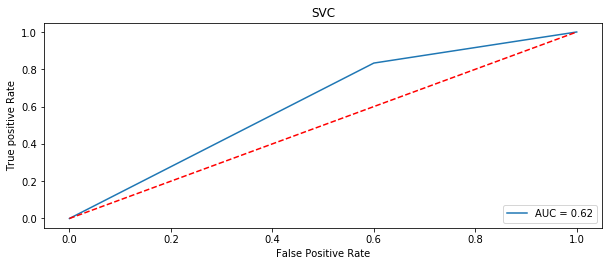

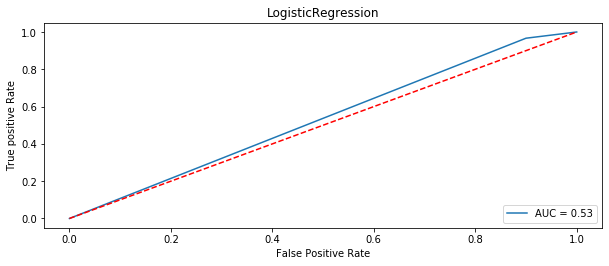

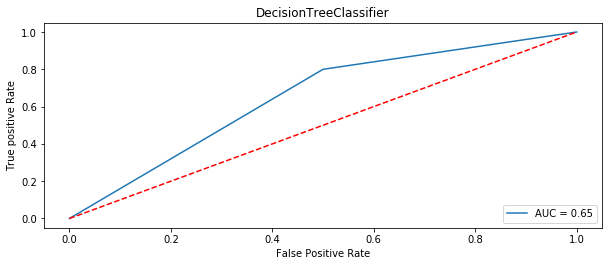

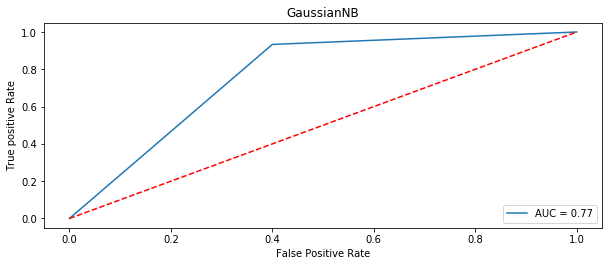

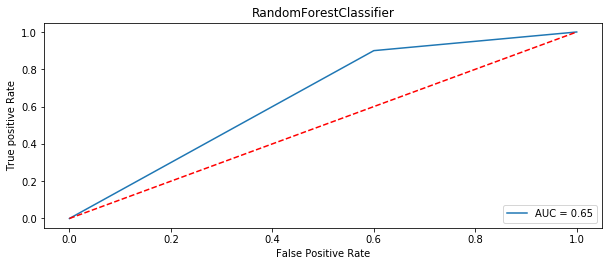

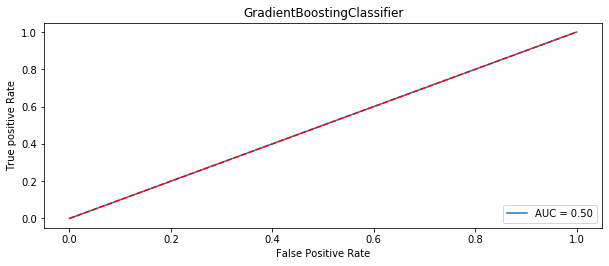

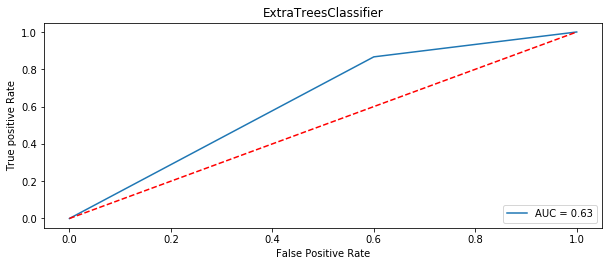

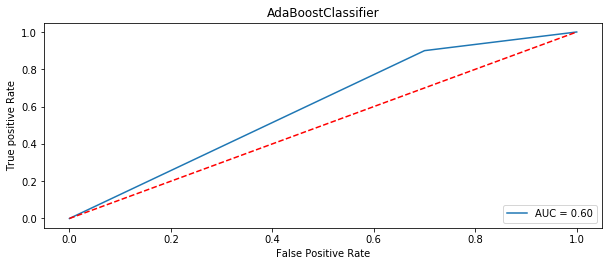

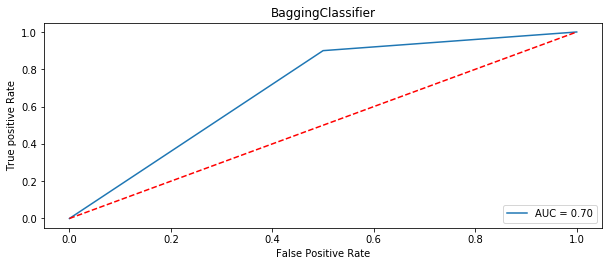

In [76]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('************',name,'**********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [77]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,80.0,77.0,66.666667
1,SVC,72.5,73.0,61.666667
2,LogisticRegression,75.0,74.0,53.333333
3,DecisionTreeClassifier,72.5,69.0,65.000000
4,GaussianNB,85.0,76.5,76.666667
5,RandomForestClassifier,77.5,76.0,65.000000
6,GradientBoostingClassifier,65.0,72.0,50.000000
7,ExtraTreesClassifier,75.0,79.5,63.333333
8,AdaBoostClassifier,75.0,69.0,60.000000
9,BaggingClassifier,80.0,74.0,70.000000


Best accuracy achive fot this dataset achive 85% by GNB with 76% cross value score and best cross value score achive 77% by ETC

In [78]:
#save best model

import joblib
from joblib import dump #from joblib import load > to load .pkl file
joblib.dump(GNB,'GNB_Heart _Disease.pkl')

['GNB_Heart _Disease.pkl']